<a href="https://colab.research.google.com/github/anhhovn/keras/blob/main/mlc-redd/simple_mlc_model_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload test and train file

In [ ]:
from google.colab import files
train = files.upload()

Saving train_with_label.csv to train_with_label.csv


In [ ]:
test = files.upload()

Saving test_with_label.csv to test_with_label.csv


# Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Read csv files

df_train : 
* date start = 04/18/2018
* date end = 05/17/2018


df_test:   
* data start = 05/18/2018
* date end = 05/27/2018

In [ ]:
import io
df_train =  pd.read_csv(io.BytesIO(train['train_with_label.csv']))
df_test = pd.read_csv(io.BytesIO(test['test_with_label.csv']))

In [ ]:
df_train.head()

,Unnamed: 0,total_power_consumption,Light,Sockets,Electric space heater,Electric stove,Fridge,Dish washer,Electric oven,Washer dryer,Unknown
0,2011-04-18 09:22:09-04:00,225.28334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-04-18 09:22:12-04:00,222.35000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-04-18 09:22:15-04:00,222.85333,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-04-18 09:22:18-04:00,222.70667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-04-18 09:22:21-04:00,222.64667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test.head()

,Unnamed: 0,total_power_consumption,Sockets,Electric space heater,Electric stove,Fridge,Dish washer,Electric oven,Light,Washer dryer,Unknown
0,2011-05-18 00:00:00-04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-05-18 00:00:03-04:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-05-18 00:00:06-04:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-05-18 00:00:09-04:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-05-18 00:00:12-04:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.describe()

,total_power_consumption,Light,Sockets,Electric space heater,Electric stove,Fridge,Dish washer,Electric oven,Washer dryer,Unknown
count,823957.000000,823957.000000,823957.000000,823957.000000,823957.000000,823957.000000,823957.00000,823957.000000,823957.000000,823957.000000
mean,125.090944,0.451327,0.895759,0.003353,0.000479,0.225967,0.03369,0.007195,0.017235,0.012963
std,312.845469,0.497626,0.305573,0.057811,0.021890,0.418218,0.18043,0.084515,0.130146,0.113115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,56.713333,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,131.553330,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,5984.797000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
df_test.describe()

,total_power_consumption,Sockets,Electric space heater,Electric stove,Fridge,Dish washer,Electric oven,Light,Washer dryer,Unknown
count,191941.000000,191941.000000,191941.000000,191941.000000,191941.000000,191941.000000,191941.000000,191941.000000,191941.000000,191941.000000
mean,83.655634,0.983985,0.002860,0.000193,0.274887,0.049020,0.020204,0.495814,0.026367,0.013098
std,322.988346,0.125535,0.053405,0.013883,0.446458,0.215911,0.140698,0.499984,0.160226,0.113694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59.656666,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3805.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# train and test numpy array

In [ ]:
import numpy as np
X_train = np.array(df_train['total_power_consumption'])
X_test = np.array(df_test['total_power_consumption'])
#remove the PC
#remove unnamed column
df_train = df_train.loc[:,~df_train.columns.str.match("Unnamed")]
df_test = df_test.loc[:,~df_test.columns.str.match("Unnamed")]
y_train = np.array(df_train.drop(['total_power_consumption'], axis = 1))
y_test = np.array(df_test.drop(['total_power_consumption'], axis = 1))


# Reshape

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0], 1))
X_test = np.reshape(X_test,(X_test.shape[0], 1))

# Keras Model

In [ ]:
n_inputs = X_train.shape[1]
n_outputs = y_train.shape[1]
model = Sequential()
model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                40        
                                                                 
 dense_7 (Dense)             (None, 9)                 189       
                                                                 
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, verbose=0, epochs=10, validation_data=(X_test,y_test))

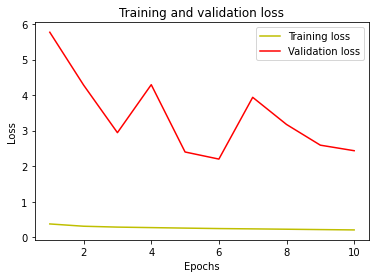

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()